In [1]:
import numpy as np
import torch

In [2]:
histograms = np.load("histograms.npy")
labels = np.load("labels.npy")

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2)

In [3]:
from torch.utils.data import DataLoader
import torch.nn as nn

BATCH_SIZE = 8

loader_train = DataLoader(
    list(zip(x_train, y_train)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

loader_test = DataLoader(
    list(zip(x_test, y_test)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

In [10]:
class MLP(torch.nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.input = nn.Linear(64, 32)
        self.hidden = nn.Linear(32, 32)
        self.output = nn.Linear(32,2)
        
    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.ReLU()(self.hidden(x))
        x = self.output(x)
        return x

In [16]:
model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_func = torch.nn.MSELoss()

EPOCHS = 10

losses = []

for epoch in range(EPOCHS):
        
    for batch in loader_train:
        
        optimizer.zero_grad()
        x, y = batch
        loss = loss_func(model(x.float()), y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

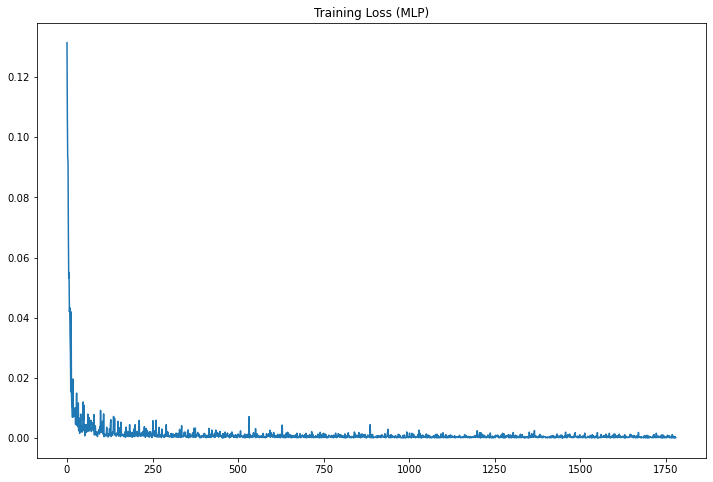

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("Training Loss (MLP)")
plt.plot(losses)

In [18]:
with torch.no_grad():
    
    losses = []
                   
    for batch in loader_test:
        
        optimizer.zero_grad()
        x, y = batch
        pred = model(x.float())
        loss = loss_func(model(x.float()), y)
        losses.append(loss.item())
        
print("MSE: {}".format(np.mean(losses)))

MSE: 0.0005946307216719206
